
# 1. Data Exploration and Preprocessing
## •	Load the "blogs_categories.csv" dataset and perform an exploratory data analysis to understand its structure and content.
## •	Preprocess the data by cleaning the text (removing punctuation, converting to lowercase, etc.), tokenizing, and removing stopwords.
## •	Perform feature extraction to convert text data into a format that can be used by the Naive Bayes model, using techniques such as TF-IDF.


In [2]:
pip install nltk

   ---------------------------------------- 0.0/1.5 MB ? eta -:--:--
   ---------------------------------- ----- 1.3/1.5 MB 8.4 MB/s eta 0:00:01
   ---------------------------------------- 1.5/1.5 MB 6.1 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [28]:
pip install textblob

   ---------------------------------------- 0.0/624.3 kB ? eta -:--:--
   ---------------------------------------- 624.3/624.3 kB 7.7 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


In [29]:
import pandas as pd 
import numpy as np
import seaborn as sns
import string
import matplotlib.pyplot as plt
import nltk
from textblob import TextBlob
from nltk.corpus import stopwords
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import train_test_split 
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import accuracy_score,precision_score,precision_recall_fscore_support,f1_score,recall_score,classification_report,confusion_matrix

In [30]:
df = pd.read_csv('blogs.csv.crdownload',on_bad_lines='skip', quoting=3)
df.head()

,Data,Labels
0,"""Path: cantaloupe.srv.cs.cmu.edu!magnesium.clu...",NaN
1,From: frank@D012S658.uucp (Frank O'Dwyer),NaN
2,Newsgroups: alt.atheism,NaN
3,Subject: Re: islamic genocide,NaN
4,Date: 23 Apr 1993 23:51:47 GMT,NaN


In [31]:
print(df.head())
print(df['Labels'].value_counts())
print(df.isnull().sum())

                                                Data Labels
0  "Path: cantaloupe.srv.cs.cmu.edu!magnesium.clu...    NaN
1          From: frank@D012S658.uucp (Frank O'Dwyer)    NaN
2                            Newsgroups: alt.atheism    NaN
3                      Subject: Re: islamic genocide    NaN
4                     Date: 23 Apr 1993 23:51:47 GMT    NaN
Labels
misc.forsale                                          107
comp.os.ms-windows.misc                               106
comp.windows.x                                        106
sci.electronics                                       105
sci.crypt                                             105
                                                     ... 
 Georgia who is planning to put up a one mile wide      1
 it's prob. only going to be                            1
 the CIS would have done it already.                    1
 it instructs one to kill under                         1
 in catholicism and protestantism)                   

In [32]:
# Preprocessing
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\psara\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [33]:
def clean_text(text):
    text = text.lower()
    text = ''.join([char for char in text if char not in string.punctuation])
    words = text.split()
    words = [word for word in words if word not in stop_words]
    return ' '.join(words)

In [34]:
df['cleaned'] = df['Data'].apply(clean_text)

In [35]:
df = df.dropna(subset=['Labels'])

In [36]:
df = df.reset_index(drop=True)

In [37]:
# TF-IDF Vectorization
tfidf = TfidfVectorizer(max_features=5000)
X = tfidf.fit_transform(df['cleaned']).toarray()
y = df['Labels']

In [38]:
print("Shape of the TF-IDF matrix:", X.shape)
print("Shape of the TF-IDF matrix:", y.shape)

Shape of the TF-IDF matrix: (11369, 5000)
Shape of the TF-IDF matrix: (11369,)


# 2. Naive Bayes Model for Text Classification
## •	Split the data into training and test sets.
## •	Implement a Naive Bayes classifier to categorize the blog posts into their respective categories. You can use libraries like scikit-learn for this purpose.
## •	Train the model on the training set and make predictions on the test set.


In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.3,random_state = 43)

In [40]:
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [41]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("Precision_Score :",precision_score(y_pred,y_test,average='weighted',zero_division = 1))
print("F1_Score :",f1_score(y_pred,y_test,average='weighted',zero_division = 1))
print("Recall :",recall_score(y_pred,y_test,average='weighted',zero_division = 1))

Accuracy: 0.01817648783347992
Precision_Score : 0.9056860047408465
F1_Score : 0.023977941120814285
Recall : 0.01817648783347992


# 3. Sentiment Analysis
## •	Choose a suitable library or method for performing sentiment analysis on the blog post texts.
## •	Analyze the sentiments expressed in the blog posts and categorize them as positive, negative, or neutral. Consider only the Data column and get the sentiment for each blog.
## •	Examine the distribution of sentiments across different categories and summarize your findings.


In [42]:
def get_sentiment(text):
    analysis = TextBlob(text)
    if analysis.sentiment.polarity > 0.1:
        return 'Positive'
    elif analysis.sentiment.polarity < -0.1:
        return 'Negative'
    else:
        return 'Neutral'

In [43]:
df['Sentiment'] = df['Data'].apply(get_sentiment)

In [44]:
df.head()

,Data,Labels,cleaned,Sentiment
0,#In article <1r5ubl$bd6@horus.ap.mchp.sni.de>,frank@D012S658.uucp (Frank O'Dwyer) writes:,article 1r5ublbd6horusapmchpsnide,Neutral
1,#|> #has few religously motivated murders,and few murders of *any*,religously motivated murders,Negative
2,#|> #kind,says very little about whether inter-religion...,kind,Positive
3,#|> No,but it allows one to conclude that there is n...,,Neutral
4,#|> in all religion (or for that matter,in catholicism and protestantism),religion matter,Neutral


In [45]:
# Sentiment distribution by category
sentiment_distribution1 = pd.crosstab(df['Labels'], df['Sentiment'], normalize='index') * 100
print(sentiment_distribution1)

Sentiment                                 Negative     Neutral    Positive
Labels                                                                    
\t\t\t\t\t\t\t      *                     0.000000  100.000000    0.000000
                                         11.764706   60.000000   28.235294
                                         33.333333   33.333333   33.333333
                                          0.000000  100.000000    0.000000
                                          0.000000  100.000000    0.000000
...                                            ...         ...         ...
very strict\t\t\t*                        0.000000    0.000000  100.000000
y and saves those values when you click   0.000000  100.000000    0.000000
y positions are known.                    0.000000    0.000000  100.000000
y) (the known true values)                0.000000  100.000000    0.000000
|| UUNET:uunet!bcr!fist                   0.000000  100.000000    0.000000

[8807 rows x 3 columns]


# 4. Evaluation
## •	Evaluate the performance of your Naive Bayes classifier using metrics such as accuracy, precision, recall, and F1-score.
## •	Discuss the performance of the model and any challenges encountered during the classification process.
## •	Reflect on the sentiment analysis results and their implications regarding the content of the blog posts.


In [46]:

# Get metrics
accuracy = accuracy_score(y_test, y_pred)
precision, recall, f1, _ = precision_recall_fscore_support(y_test, y_pred, average='weighted',zero_division = 1)


In [47]:
print("Accuracy :",accuracy)
print("Precision_recall_fscore_support :",precision, recall, f1, _ )

Accuracy : 0.01817648783347992
Precision_recall_fscore_support : 0.961003504608911 0.01817648783347992 0.01237503454614555 None


In [48]:
conf_matrix = confusion_matrix(y_test, y_pred)

In [49]:
# 3. Sentiment Analysis Reflection
print("\n--- Sentiment Analysis Summary ---\n")
sentiment_counts = df['Sentiment'].value_counts(normalize=True) * 100
print(sentiment_counts)


--- Sentiment Analysis Summary ---

Sentiment
Neutral     83.929985
Positive    10.080042
Negative     5.989973
Name: proportion, dtype: float64


In [50]:
print("\n--- Sentiment by Category (in %) ---\n")
sentiment_by_category = pd.crosstab(df['Labels'], df['Sentiment'], normalize='index') * 100
print(sentiment_by_category.round(2))



--- Sentiment by Category (in %) ---

Sentiment                                Negative  Neutral  Positive
Labels                                                              
\t\t\t\t\t\t\t      *                        0.00   100.00      0.00
                                            11.76    60.00     28.24
                                            33.33    33.33     33.33
                                             0.00   100.00      0.00
                                             0.00   100.00      0.00
...                                           ...      ...       ...
very strict\t\t\t*                           0.00     0.00    100.00
y and saves those values when you click      0.00   100.00      0.00
y positions are known.                       0.00     0.00    100.00
y) (the known true values)                   0.00   100.00      0.00
|| UUNET:uunet!bcr!fist                      0.00   100.00      0.00

[8807 rows x 3 columns]


In [51]:
print("Classification Report :",classification_report(y_pred,y_test,zero_division = 1))

Classification Report :                                                                                        precision    recall  f1-score   support

                                                                                            0.17      0.03      0.05       152
                                                                                            0.00      1.00      0.00         0
                                          |MKS| 35 King St. North       mike@mks.com        0.00      1.00      0.00         0
                                                                |    - Ford Fairlane.       0.00      1.00      0.00         0
                                                    InterNet : nfotis@theseas.ntua.gr       0.00      1.00      0.00         0
                                                                                (WAS:       0.00      1.00      0.00         0
                                                            2 May 1993 13:58:06 -0400 

C:\Users\psara\AppData\Local\Temp\ipykernel_6536\2968180583.py:16: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\psara\AppData\Local\Temp\ipykernel_6536\2968180583.py:16: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  plt.tight_layout()
C:\Users\psara\AppData\Local\Temp\ipykernel_6536\2968180583.py:16: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()
C:\Users\psara\anaconda3\envs\myenv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Glyph 9 (	) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
C:\Users\psara\anaconda3\envs\myenv\lib\site-packages\IPython\core\pylabtools.py:152: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


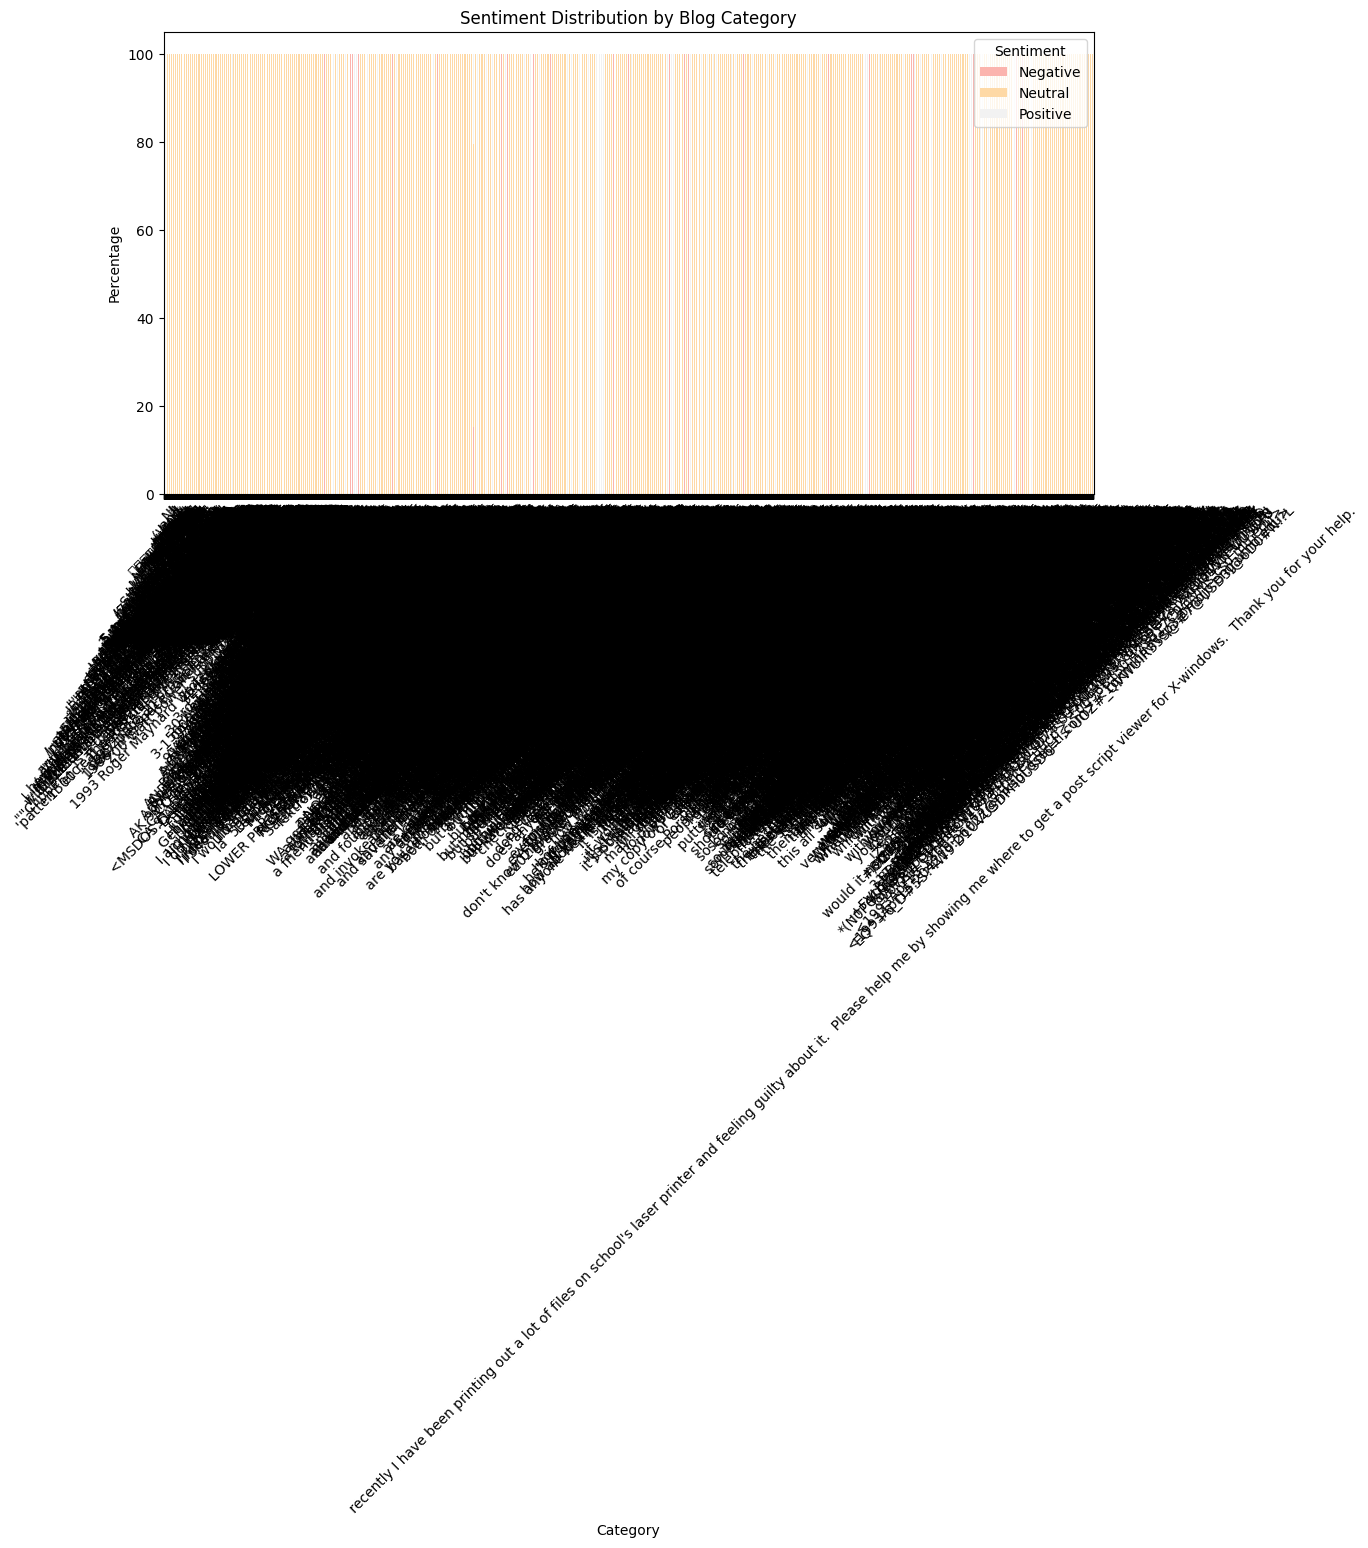

In [27]:
# Optional: Visualize sentiment distribution

# Assuming 'sentiment_by_category' should be 'sentiment_distribution1'
ax = sentiment_distribution1.plot(kind='bar', stacked=True, figsize=(12,6), colormap='Pastel1') 

plt.title('Sentiment Distribution by Blog Category')
plt.ylabel('Percentage')
plt.xlabel('Category')
plt.legend(title='Sentiment')
plt.xticks(rotation=45)

# Escape special characters in x-axis labels to avoid parsing issues
ax.set_xticklabels([label.get_text().replace('$', 'USD') for label in ax.get_xticklabels()])

plt.tight_layout()
plt.show()